# WM-06: Vector potential and magnetic field in curvilinear coordinates (dipole magnetic field)

In [1]:
(* In this example vector potential is derived for the sector dipole magnet *)

In [2]:
(* Differential operations in curvilinear coordinates *)

(* Gradient *)
(* Input  : scalar *)
(* Output : covariant vector *)

ClearAll[grad] ;
grad[sqrt_][scalar_, coordinates_] :=  D[scalar, {coordinates}] ;

(* Divergence *)
(* Input  : contravariant vector *)
(* Output : scalar *)

ClearAll[div] ;
div[sqrt_][vector_, coordinates_] := 1/sqrt*Div[sqrt*vector, coordinates] ;

(* Curl *)
(* Input  : covariant vector *)
(* Output : contravariant vector *)

ClearAll[curl] ;
curl[sqrt_][vector_, coordinates_] := 1/sqrt*Curl[vector, coordinates] ;

(* Laplacian *)
(* Input  : scalar *)
(* Output : scalar *)

ClearAll[laplacian] ;
laplacian[sqrt_, inverse_][scalar_, coordinates_] := div[sqrt][inverse . grad[sqrt][scalar, coordinates], coordinates] ;

In [23]:
(* Define field and vector potential in (qx, qy, qz) cartesian coordinates *)
(* Dipole  (cartesian) *)

{aqx, aqy, aqz} = {0, 0,  -b qx} ;
{bqx, bqy, bqz} = {0, b, 0} ;

In [27]:
(* Test *)
(* Note, laplasian of the last vector field component being zero is a special case for this transverse field in cartesian frame *)

Simplify[Div[{bqx, bqy, bqz}, {qx, qy, qz}]]
Simplify[{bqx, bqy, bqz} - Curl[{aqx, aqy, aqz}, {qx, qy, qz}]]
Simplify[Laplacian[Last[{aqx, aqy, aqz}], {qx, qy, qz}]]

0
{0, 0, 0}
0

In [32]:
(* Define the reference curve *)
(* Note, the reference curve should be parameterized by its arclength *)

$Assumptions = {r > 0, r + x > 0, r + y > 0} ;

ClearAll[rx] ;
ClearAll[ry] ;
ClearAll[rz] ;

(* Circle *)

rx[s_] := r (1 - Cos[s/r])
ry[s_] := 0
rz[s_] := - r Sin[s/r] 

rxyz = {rx[s], ry[s], rz[s]} ;

rxyz /. s -> 0

{0, 0, 0}

-Graphics3D-
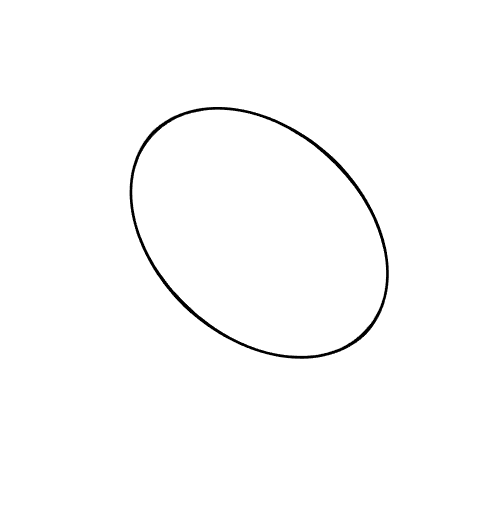

In [44]:
(* Plot *)

ParametricPlot3D[rxyz /. r -> 1, {s, 0, 25}, ImageSize -> Medium, Boxed -> False, Axes -> False, PlotStyle -> Black]

In [46]:
(* Compute Frenet Serret data for the reference curve *)
(* Note, generic curve can be used with FrenetSerretSystem function *)

{{curvature, torsion}, {tangent, normal, binormal}} = Simplify[FrenetSerretSystem[rxyz, s]] ;

(* Accelerator reference frame convension (inward-pointing normal) *)

normal = - normal ;
binormal = Cross[tangent, normal] ;

1
{-, 0}
 r
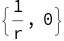

In [52]:
(* Curvature and torsion *)

Simplify[{curvature, torsion}]

In [54]:
(* Coordinates (x, y, s) are contravariant coordinates *)

coordinates = {x, y, s} ;

In [56]:
(* Define radius vector expressed in (x, y, s) curvilinear coordinates *)
(* Coordinates (x, y, s) are contravariant coordinates *)

radius = Simplify[rxyz + x normal + y binormal] ;

(* Covariant basis *)

{ea, eb, ec} = Transpose[D[radius, {coordinates}]] ;

(* Metric tensor *)

forward = Simplify[Outer[Dot, {ea, eb, ec}, {ea, eb, ec}, 1]] ;

(* Metric tensor inverse *)

inverse = Simplify[Inverse[forward]] ;

(* Scaling factor *)

sqrt = Simplify[Sqrt[Det[forward]]] ;

(* Contravariant basis *)

{eA, eB, eC} = Transpose[inverse] . {ea, eb, ec} ;

(* Transformation *)

transform = Thread[{qx, qy, qz} -> radius] ;

(* Construct covariant components *)

{Aa, Ab, Ac} = Simplify[{ea, eb, ec} . {aqx, aqy, aqz} /. transform] ;
{Ba, Bb, Bc} = Simplify[{ea, eb, ec} . {bqx, bqy, bqz} /. transform] ;

(* Construct contravariant components *)

{AA, AB, AC}  = Simplify[Transpose[inverse . {Aa, Ab, Ac}] ] ;
{BA, BB, BC}  = Simplify[Transpose[inverse . {Ba, Bb, Bc}] ] ;

(* Divergence of magnetic field *)

Simplify@PowerExpand@Simplify[div[sqrt][{BA, BB, BC}, coordinates]]

(* Curl of vector potential *)

Simplify@PowerExpand@Simplify[{BA, BB, BC} - curl[sqrt][{Aa, Ab, Ac}, coordinates]]

(* Vector potential gauge *)

Simplify@PowerExpand@Simplify[{BA, BB, BC} - curl[sqrt][{Aa, Ab, Ac} + grad[sqrt][f @@ coordinates, coordinates], coordinates]]

0
{0, 0, 0}
{0, 0, 0}

In [83]:
(* Transformation to cartesian *)

{acx, acy, acz} = Simplify[Dot[{AA, AB, AC}, {ea, eb, ec}]] ;
{bcx, bcy, bcz} = Simplify[Dot[{BA, BB, BC}, {ea, eb, ec}]] ;

In [86]:
(* Compare with initial *)

Simplify[{acx, acy, acz} - {aqx, aqy, aqz} /. transform]
Simplify[{bcx, bcy, bcz} - {bqx, bqy, bqz} /. transform]

{0, 0, 0}
{0, 0, 0}

s       s               s                    s
{-(b (-r + (r + x) Cos[-]) Sin[-]), 0, -(b Cos[-] (-r + (r + x) Cos[-]))}
                       r       r               r                    r
{0, b, 0}
0
0
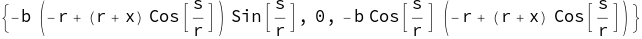

In [89]:
(* Projections (orthonormal FS basis) *)

{A1, A2, A3} = Simplify[Dot[{normal, binormal, tangent}, {acx, acy, acz}]] 
{B1, B2, B3} = Simplify[Dot[{normal, binormal, tangent}, {bcx, bcy, bcz}]] 

Simplify[Total[{aqx, aqy, aqz}^2] - Total[{A1, A2, A3}^2] /. transform]
Simplify[Total[{bqx, bqy, bqz}^2] - Total[{B1, B2, B3}^2] /. transform]

{0, 0, 0}
         1  b x (2 r + x)
{0, 0, -(-) -------------}
         2        r
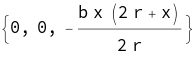

In [94]:
(* Simplify covariant vector potential by gauge transformation *)

ClearAll[alpha] ;
ClearAll[beta] ;

{Ca, Cb, Cc} = {Aa, Ab, Ac} + grad[sqrt][alpha[s] + beta[x, s], {x, y, s}] ;

beta[x_, s_] = Simplify[beta[x, s] /. First[DSolve[{Ca == 0, beta[0, s] == alpha[s]}, beta[x, s], {x, s}]]] ;
alpha[s_] = Simplify[alpha[s] /. First[DSolve[{(Cc /. x -> 0) == 0, alpha[0] == 0}, alpha[s], s]]] ;

(* Check *)

Simplify[{BA, BB, BC} - curl[sqrt][{Aa, Ab, Ac} + grad[sqrt][alpha[s] + beta[x, s], {x, y, s}], {x, y, s}]]

(* Transformed potential (covariant) *)

Simplify[({Aa, Ab, Ac} + grad[sqrt][alpha[s] + beta[x, s], {x, y, s}])]

1  b x (2 r + x)
{0, 0, -(-) -------------}
         2      r + x
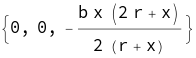

In [104]:
(* Physical *)

{AA, AB, AC}  = Simplify[Transpose[inverse . ({Aa, Ab, Ac} + grad[sqrt][alpha[s] + beta[x, s], {x, y, s}])] ] ;
{acx, acy, acz} = Simplify[Dot[{AA, AB, AC}, {ea, eb, ec}]] ;
{A1, A2, A3} = Simplify[Dot[{normal, binormal, tangent}, {acx, acy, acz}]] 

1  b x (2 r + x)
{0, 0, -(-) -------------}
         2      r + x
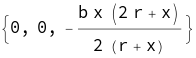

In [108]:
(* Expected solution for dipole *)

Simplify[{0, 0, -1/2*(b*x*(2*r + x))/(r + x)}]